<a href="https://colab.research.google.com/github/aravindskumar98/DL/blob/main/KNNwithPixels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
import scipy.io
## Import data
mat = scipy.io.loadmat('YaleB_32x32.mat')

##obtain input pixels and output
fea = np.array(mat['fea'])
gnd = np.array(mat['gnd'])

##Data preprocessing

## join the input and output into one numpy array
data = np.concatenate((fea, gnd), axis=1)

In [ ]:
data_faces = np.split(data, np.where(np.diff(data[:,-1]))[0]+1)

# Part 2.1

### Question 1

k = 1, m = 10, pwr = 2, Error Rate= 0.508
k = 1, m = 20, pwr = 2, Error Rate= 0.312
k = 1, m = 30, pwr = 2, Error Rate= 0.270
k = 1, m = 40, pwr = 2, Error Rate= 0.243
k = 1, m = 50, pwr = 2, Error Rate= 0.165


Text(0, 0.5, 'Error Rate')

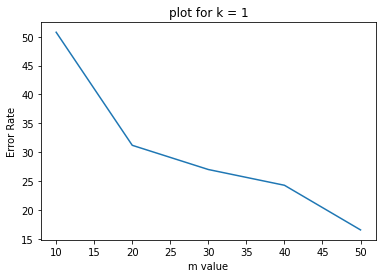

In [ ]:
ms = [10,20,30,40,50]
pwr = 2
k = 1
score_m = []
for m in ms:
  trainX = []
  trainY = []
  testX = []
  testY = []
  ## iterate through each person and sample m instances
  for person in data_faces:
    df = pd.DataFrame(person)
    training_data = df.sample(n = m, random_state=25)
    testing_data = df.drop(training_data.index)
    for i in range(len(training_data)):
      trainX.append(np.array(training_data.iloc[i,:])[:-1])
      trainY.append(np.array(training_data.iloc[i,:])[-1])
    for i in range(len(testing_data)):
      testX.append(np.array(testing_data.iloc[i,:])[:-1])
      testY.append(np.array(testing_data.iloc[i,:])[-1])

  X_train = np.array(trainX)
  y_train = np.array(trainY)
  X_test = np.array(testX)
  y_test = np.array(testY)

  nbrs = KNeighborsClassifier(n_neighbors=k)

  ## fitting it to the training data
  nbrs.fit(X_train, y_train)

  ## prediction of the KNN model
  pred_out = nbrs.predict(X_test)

  ## accuracy of the model
  accuracy = metrics.accuracy_score(y_test, pred_out)
  print(f'k = {k}, m = {m}, pwr = {pwr}, Error Rate= {(1-accuracy):.3f}')

  score_m.append((1-accuracy)*100)

plt.plot(ms,score_m)
plt.title(f"plot for k = {k}")
plt.xlabel("m value")
plt.ylabel("Error Rate")

In [ ]:

def plotFunction(misclassified, index, original, X_train, m, k):
  array = misclassified[0]
  # val = misclassified[1]
  plt.figure(figsize =(2.4 * len(array)+1, 2.4 * 1))
  plt.subplot(1, len(array)+1,1, xlabel = f'original-{index//m+1}')
  # ax.xlabel('original')
  plt.imshow(original.reshape(32,32).T)
  plt.suptitle(f'Showing top {k} misclassified for m = {m} below : ')
  for i,im in enumerate(array):
    plt.subplot(1, len(array)+1,i+2, xlabel = f'face no-{im//m+1}')
    plt.imshow(X_train[[im]].reshape(32,32).T)
    

### Question 2

k = 1, m = 10, pwr = 2, Error Rate = 0.508
k = 2, m = 10, pwr = 2, Error Rate = 0.601
k = 3, m = 10, pwr = 2, Error Rate = 0.603
k = 5, m = 10, pwr = 2, Error Rate = 0.610
k = 10, m = 10, pwr = 2, Error Rate = 0.639
k = 1, m = 20, pwr = 2, Error Rate = 0.312
k = 2, m = 20, pwr = 2, Error Rate = 0.434
k = 3, m = 20, pwr = 2, Error Rate = 0.455
k = 5, m = 20, pwr = 2, Error Rate = 0.477
k = 10, m = 20, pwr = 2, Error Rate = 0.523
k = 1, m = 30, pwr = 2, Error Rate = 0.270
k = 2, m = 30, pwr = 2, Error Rate = 0.390
k = 3, m = 30, pwr = 2, Error Rate = 0.408
k = 5, m = 30, pwr = 2, Error Rate = 0.418
k = 10, m = 30, pwr = 2, Error Rate = 0.457
k = 1, m = 40, pwr = 2, Error Rate = 0.243
k = 2, m = 40, pwr = 2, Error Rate = 0.331
k = 3, m = 40, pwr = 2, Error Rate = 0.360
k = 5, m = 40, pwr = 2, Error Rate = 0.351
k = 10, m = 40, pwr = 2, Error Rate = 0.379
k = 1, m = 50, pwr = 2, Error Rate = 0.165
k = 2, m = 50, pwr = 2, Error Rate = 0.212
k = 3, m = 50, pwr = 2, Error Rate = 0.220
k = 5, 

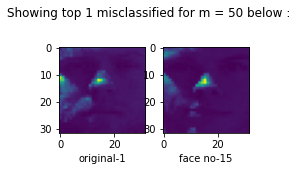

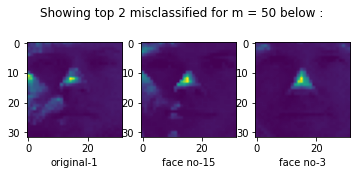

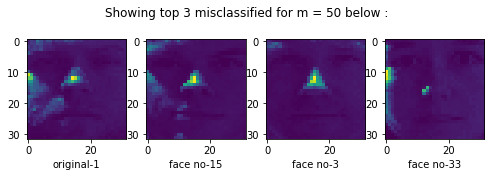

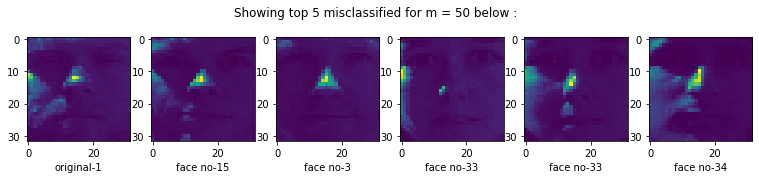

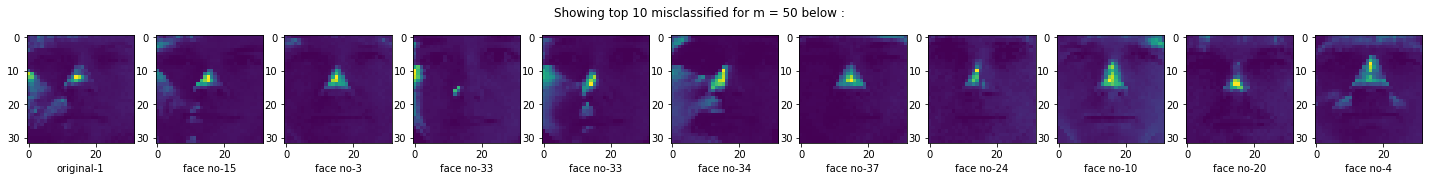

In [ ]:
k_set = [1,2,3,5,10]
m_mpp = {}
## setting p value for distance metric
pwr = 2

## defining distance function
def mydist(x, y):
  return np.sum((x-y)**pwr)

## contains different values on m that we iterate through
m_set = [10,20,30,40,50]
for m in m_set:
  m_mpp[m]=[]

## this array will store the errors for the corresponding m value
score_m = []

for m in ms:
  trainX = []
  trainY = []
  testX = []
  testY = []
  ## iterate through each person and sample m instances
  for person in data_faces:
    df = pd.DataFrame(person)
    training_data = df.sample(n = m, random_state=25)
    testing_data = df.drop(training_data.index)
    for i in range(len(training_data)):
      trainX.append(np.array(training_data.iloc[i,:])[:-1])
      trainY.append(np.array(training_data.iloc[i,:])[-1])
    for i in range(len(testing_data)):
      testX.append(np.array(testing_data.iloc[i,:])[:-1])
      testY.append(np.array(testing_data.iloc[i,:])[-1])

  X_train = np.array(trainX)
  y_train = np.array(trainY)
  X_test = np.array(testX)
  y_test = np.array(testY)

  for k in k_set:

    ## defining the classifier
    nbrs = KNeighborsClassifier(n_neighbors=k)

    ## fitting it to the training data
    nbrs.fit(X_train, y_train)

    ## prediction of the KNN model
    pred_out = nbrs.predict(X_test)

    ## accuracy of the model
    accuracy = metrics.accuracy_score(pred_out, y_test)
    print(f'k = {k}, m = {m}, pwr = {pwr}, Error Rate = {(1-accuracy):.3f}')
    count = 0

    ### Printing misclassified cases for m = 50
    misclassified = None
    img = None
    index = None
    for i in range(len(pred_out)):
      if pred_out[i] != y_test[i]:
        count+=1
        index = i
        misclassified = nbrs.kneighbors(X_test[[i]], return_distance=False)
        img = X_test[[i]]
      if count == 1:
        break
    if m == 50:
      plotFunction(misclassified, index, img ,X_train, m, k)
    m_mpp[m].append((1-accuracy)*100)


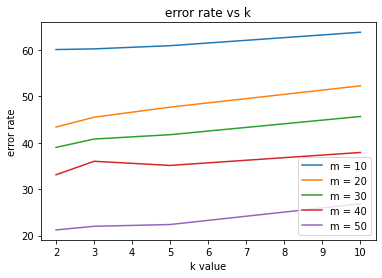

In [ ]:
for m in m_set:
  plt.plot(k_set[1:],m_mpp[m][1:],label = f"m = {m}")
plt.title(f"error rate vs k")
plt.xlabel("k value")
plt.ylabel("error rate")
plt.legend()

### Question 3

k = 3, m = 30, p = 1, error_rate= 0.458
k = 3, m = 30, p = 2, error_rate= 0.408
k = 3, m = 30, p = 3, error_rate= 0.366
k = 3, m = 30, p = 5, error_rate= 0.374
k = 3, m = 30, p = 10, error_rate= 0.450


Text(0, 0.5, 'error_rate')

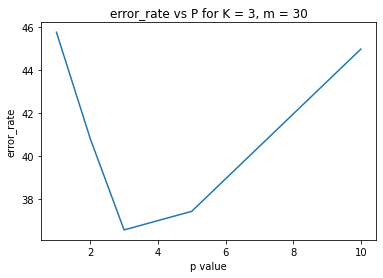

In [ ]:

## setting p value for distance metric
p_set = [1,2,3,5,10]
score_p = []

## defining distance function
def mydist(x, y):
  return np.sum((x-y)**pwr)

k = 3
m = 30

trainX = []
trainY = []
testX = []
testY = []
## iterate through each person and sample m instances
for person in data_faces:
  df = pd.DataFrame(person)
  training_data = df.sample(n = m, random_state=25)
  testing_data = df.drop(training_data.index)
  for i in range(len(training_data)):
    trainX.append(np.array(training_data.iloc[i,:])[:-1])
    trainY.append(np.array(training_data.iloc[i,:])[-1])
  for i in range(len(testing_data)):
    testX.append(np.array(testing_data.iloc[i,:])[:-1])
    testY.append(np.array(testing_data.iloc[i,:])[-1])

X_train = np.array(trainX)
y_train = np.array(trainY)
X_test = np.array(testX)
y_test = np.array(testY)


for pwr in p_set:

  ## defining the classifier
  nbrs = KNeighborsClassifier(n_neighbors=k, p = pwr)

  ## fitting it to the training data
  nbrs.fit(X_train, y_train)

  ## prediction of the KNN model
  pred_out = nbrs.predict(X_test)

  ## accuracy of the model
  accuracy = metrics.accuracy_score(pred_out, y_test)
  error_rate = 1 - accuracy
  print(f'k = {k}, m = {m}, p = {pwr}, error_rate= {error_rate:.3f}')
  score_p.append(error_rate*100)

plt.plot(p_set,score_p)
plt.title(f"error_rate vs P for K = {k}, m = {m}")
plt.xlabel("p value")
plt.ylabel("error_rate")
